# Data Mining Final Project - Team APEX


## WINE QUALITY PREDICTION 

### Authored by :

#### Team Name : APEX

VANDANA SIRPA         - U87155086

SRI VENKATESH KUMAR SATTU - U01719657

SAI KOTI REDDY SEELAM  - U67287368

KEERTHI BAI REDDY - U91888933

SHEERKA SAI NIKHITHA - U19250380

PRASHANTH REDDY THUDI - U52715459


## Introduction and Overview

The various chemical components in wine give the wine its distinct taste and aroma. Appreciation of wine quality involves moving beyond our innate preferences. These physicochemical properties can be used to model wine quality. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. 

Our objective is in this project is to create a Machine Learning models that can predict the quality of the wine with the help of the chemical properties involved in it.


## Business Objective

Our target is to predict the target variable "Quality" based on its ranking on performing classification models.

## Import Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [92]:
df = pd.read_csv("winequality-white.csv")

## Understanding Data

In [93]:
print("Rows, columns: " + str(df.shape))
df.head()

Rows, columns: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Missing Values

In [94]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Unique Values in target variable

In [95]:
#Checking the unique values in the target variable
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

<AxesSubplot:>

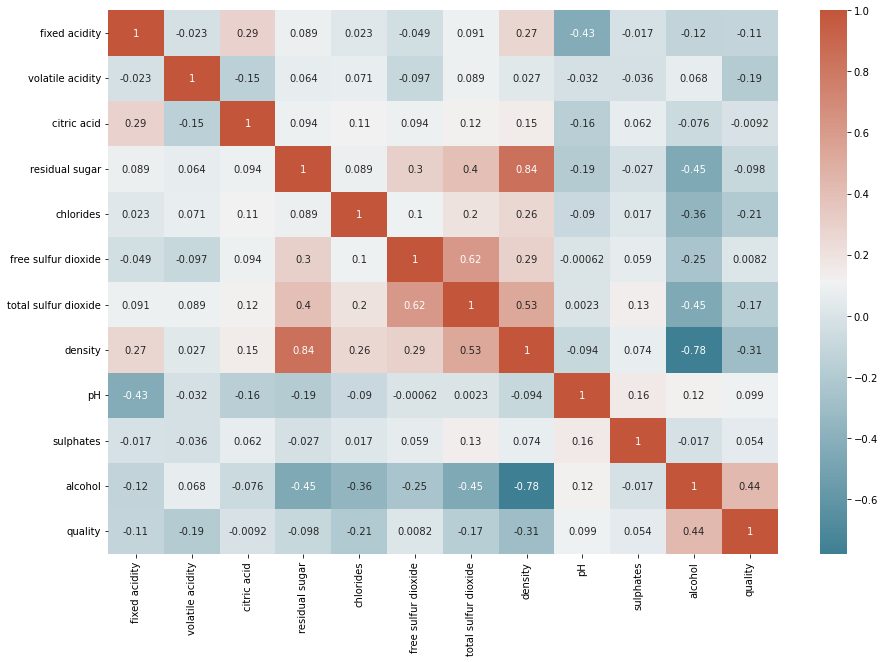

In [96]:
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Normalize Data

In [97]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

min_max_df = scaler.fit_transform(df.drop("quality", axis = 1))
min_max_df = pd.DataFrame(min_max_df, columns = df.columns[:-1])

In [98]:
#normalized dataframe
min_max_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452


In [99]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 6 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [100]:
df['goodquality'].value_counts()

1    3258
0    1640
Name: goodquality, dtype: int64

### Now I will use imblearn library for the oversampling of the data, so our model is more generalized

In [101]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [102]:
X.shape, y.shape

((6516, 11), (6516,))

In [103]:
# See proportion of good vs bad wines
y.value_counts()

1    3258
0    3258
Name: goodquality, dtype: int64

## Our target variable is now balanced

## Split the Data

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 1)

## K Nearest Neighbour (K-NN)

In [105]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75       960
           1       0.79      0.67      0.73       995

    accuracy                           0.74      1955
   macro avg       0.75      0.74      0.74      1955
weighted avg       0.75      0.74      0.74      1955



## K Nearest Neighbour(K-NN) model with hyperparameter Tuning

In [106]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn_gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)
kclassifer = knn_gs.fit(X_train, y_train)
kclassifer.best_score_
kclassifer.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [107]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',metric = 'manhattan')
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       960
           1       0.88      0.76      0.81       995

    accuracy                           0.82      1955
   macro avg       0.83      0.82      0.82      1955
weighted avg       0.83      0.82      0.82      1955



In [108]:
confusion_matrix(y_test, y_knn)

array([[853, 107],
       [242, 753]], dtype=int64)

## Decision Tree Classifier

In [109]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       960
           1       0.80      0.79      0.80       995

    accuracy                           0.79      1955
   macro avg       0.79      0.79      0.79      1955
weighted avg       0.79      0.79      0.79      1955



## Decision Tree with Hyperparameter Tuning

In [110]:
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20], 
    'min_samples_split': [2, 5, 10, 30, 50, 70], 
    'min_impurity_decrease': [0, 0.0003, 0.001]
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print('score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

score:  0.7877576874352182
parameters:  {'max_depth': 20, 'min_impurity_decrease': 0.0003, 'min_samples_split': 2}


In [111]:
dt = DecisionTreeClassifier(max_depth= 20, min_impurity_decrease= 0.0003, min_samples_split= 2)
dt.fit(X_train, y_train)
y_dt = rf.predict(X_test)
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       960
           1       0.87      0.85      0.86       995

    accuracy                           0.86      1955
   macro avg       0.86      0.86      0.86      1955
weighted avg       0.86      0.86      0.86      1955



In [112]:
confusion_matrix(y_test, y_dt)

array([[839, 121],
       [150, 845]], dtype=int64)

## Random Forest Classifier

In [113]:
rForest = RandomForestClassifier(random_state=1)
rForest.fit(X_train, y_train)
y_pred = rForest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       960
           1       0.88      0.85      0.86       995

    accuracy                           0.86      1955
   macro avg       0.86      0.86      0.86      1955
weighted avg       0.87      0.86      0.86      1955



## Random Forest Classifier with Hyperparameter Tuning

In [114]:
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10], 
    'min_impurity_decrease': [0, 0.0003,0.001], 
    'n_estimators' : [100,150,200]
}
gridSearch = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=k_fold,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print('score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

score:  0.8537578217973818
parameters:  {'max_depth': 30, 'min_impurity_decrease': 0, 'min_samples_split': 2, 'n_estimators': 200}


In [115]:
rf = RandomForestClassifier(max_depth= 30, min_impurity_decrease= 0, min_samples_split= 2, n_estimators = 200)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       960
           1       0.88      0.85      0.87       995

    accuracy                           0.87      1955
   macro avg       0.87      0.87      0.87      1955
weighted avg       0.87      0.87      0.87      1955



In [116]:
confusion_matrix(y_test, y_rf)

array([[848, 112],
       [151, 844]], dtype=int64)

## ADABoost Classification

In [117]:
aBoost = AdaBoostClassifier(random_state=1)
aBoost.fit(X_train, y_train)
y_pred = aBoost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       960
           1       0.78      0.74      0.76       995

    accuracy                           0.76      1955
   macro avg       0.77      0.77      0.76      1955
weighted avg       0.77      0.76      0.76      1955



## AdaBoost Classifier with Hyperparameter Tuning

In [118]:
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
     'n_estimators': [2, 5, 10, 20, 30,40,50], 
    'learning_rate': (0.1,0.2,0.3,0.4,0.5),
}
gridSearch = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid, cv=k_fold,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print('score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

score:  0.768028043303006
parameters:  {'learning_rate': 0.4, 'n_estimators': 50}


In [119]:
ab = AdaBoostClassifier(n_estimators= 50, learning_rate= 0.4)
ab.fit(X_train, y_train)
y_ab = rf.predict(X_test)
print(classification_report(y_test, y_ab))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       960
           1       0.88      0.85      0.87       995

    accuracy                           0.87      1955
   macro avg       0.87      0.87      0.87      1955
weighted avg       0.87      0.87      0.87      1955



In [120]:
confusion_matrix(y_test, y_ab)

array([[848, 112],
       [151, 844]], dtype=int64)

## GradientBoost Classifier

In [121]:
gBoost = GradientBoostingClassifier(random_state=1)
gBoost.fit(X_train, y_train)
y_pred = gBoost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       960
           1       0.82      0.78      0.80       995

    accuracy                           0.80      1955
   macro avg       0.80      0.80      0.80      1955
weighted avg       0.80      0.80      0.80      1955



## Gradient Boost Classification with Hyperparameter Tuning

In [122]:
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              'max_features': [1.0, 0.3, 0.1] 
}
gridSearch = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=k_fold,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print('score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

score:  0.8425788897846367
parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 20}


In [123]:
gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 8, max_features = 0.3, min_samples_leaf = 20)
gb.fit(X_train, y_train)
y_gb = gb.predict(X_test)
print(classification_report(y_test, y_gb))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       960
           1       0.88      0.84      0.86       995

    accuracy                           0.86      1955
   macro avg       0.86      0.86      0.86      1955
weighted avg       0.86      0.86      0.86      1955



In [124]:
confusion_matrix(y_test, y_gb)

array([[843, 117],
       [156, 839]], dtype=int64)

## XGBoost Classifier

In [125]:
import xgboost as xgb
xgBoost = xgb.XGBClassifier(random_state=1)
xgBoost.fit(X_train, y_train)
y_pred = xgBoost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       960
           1       0.88      0.86      0.87       995

    accuracy                           0.87      1955
   macro avg       0.87      0.87      0.87      1955
weighted avg       0.87      0.87      0.87      1955



## XGBoost Classifier with Hyperparameter Tuning


In [126]:
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': (1,2,3,4,5),
    'max_leaves': (1,2,3,4,5,6),
    'learning_rate': (0.1,0.15,0.30,0.40),
}
gridSearch = GridSearchCV(XGBClassifier(random_state=1), param_grid, cv=k_fold,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print('score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

score:  0.848275365657031
parameters:  {'learning_rate': 0.4, 'max_depth': 5, 'max_leaves': 1}


In [127]:
xg = XGBClassifier(learning_rate = 0.4, max_depth = 5, max_leaves = 1)
xg.fit(X_train, y_train)
y_xg = xg.predict(X_test)
print(classification_report(y_test, y_xg))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       960
           1       0.88      0.86      0.87       995

    accuracy                           0.87      1955
   macro avg       0.87      0.87      0.87      1955
weighted avg       0.87      0.87      0.87      1955



In [128]:
confusion_matrix(y_test, y_xg)

array([[840, 120],
       [137, 858]], dtype=int64)

## Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       960
           1       0.75      0.68      0.72       995

    accuracy                           0.73      1955
   macro avg       0.73      0.73      0.73      1955
weighted avg       0.73      0.73      0.73      1955



## Logistic Regression through Hyperparameter Tuning 

In [130]:
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'multi_class' : ['auto'], 
    'n_jobs': [None], 
    'penalty':  ['l2']
}
gridSearch = GridSearchCV(LogisticRegression(random_state=1), param_grid, cv=k_fold,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print('score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

score:  0.7228574033552151
parameters:  {'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2'}


In [131]:
lr = LogisticRegression(multi_class = 'auto', n_jobs = None, penalty = 'l2')
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       960
           1       0.75      0.68      0.72       995

    accuracy                           0.73      1955
   macro avg       0.73      0.73      0.73      1955
weighted avg       0.73      0.73      0.73      1955



In [132]:
confusion_matrix(y_test, y_lr)

array([[739, 221],
       [315, 680]], dtype=int64)

In [133]:
accuracies = { 
    'Models' : ['KNN', 'Decision Tree Classifier', 'Randon Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'XGBClassifier','Logistic Regression'],
    'Accuracy' : [82,87, 87, 87, 86,86,72]
}

In [134]:
accuracy_df = pd.DataFrame(data = accuracies)
accuracy_df.set_index("Models", inplace = True)

Text(0.5, 0, 'Accuracies')

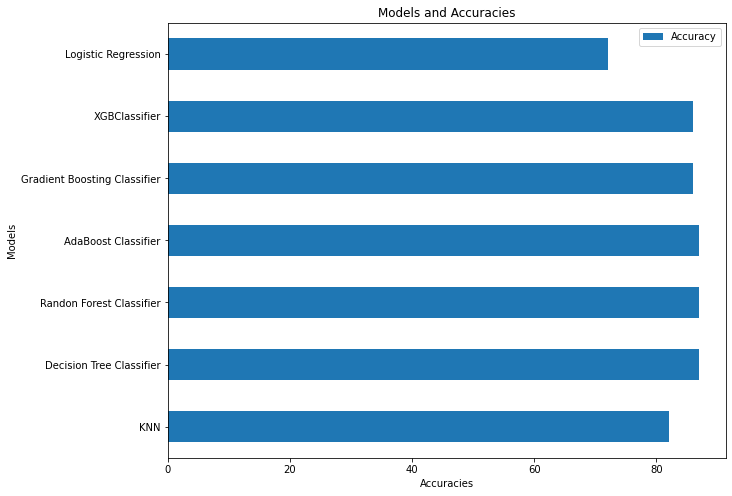

In [135]:
accuracy_df.plot.barh(figsize = (10,8))
plt.title("Models and Accuracies")
plt.xlabel("Accuracies")

In [136]:
## confusion matrix for decision Tree
confusion_matrix(y_test, y_dt)

array([[839, 121],
       [150, 845]], dtype=int64)

## Metrics comparision and best model for this Dataset

Our base model has given good accuracies. We have performed Hyparameter Tuning to get the best results out of all the models.
We have performed predictions using 7 different models and compared the results for F1 from which Random Forest, Decision Tree and AdaBoost classifiers with hyperparameter tuning has performed the best and gave the highest score as 87%.

##### Base Results: 


##### Hyperparameter Tuning results:

As per the confusion matrix, the False Positives and False Negatives are lesser indicating it is a good fit and infers if given a new wine brand , with the chemical properties incurred from the accuracies, we will be able to predict its accuracy with 87% and the manufacturer can increase the sales benefitting from the accuracies projected from these models.

We have performed Data balancing and normalizing on the base dataset from which our model has predicted majority value of TP correctly. This does incur our model performs well with the test data.

From the confusion matrix of decision tree classifier:

False Positive = 111. From the dataset, it infers the quality of wine is low but is being sold for higher price . It will incur losses to the wine manufacturer and distributor. Also this percent is much less compared to the True Negative. 

False Negative = 150. From this dataset, it infers the quality of wine is good but is being sold for less price. It will incur losses as the manufacturer could have had high profits if the wine is sold for the price as per its quality.

As result, I have choosen F1 score as my evaluation metric on Hyperparameter Tuning.

##### Conclusion:

From this model, we can find the quality of the wine with it's chemical properties from which wine manufactures can increase the sales and incur profits with quality wine they can predict with the chemical combinations even before manufacturing the product.








